# Persoalan 4
Carilah data transaksi peminjaman, lalu lakukan clustering data perilaku pemijaman dan pengembalian. Kemudian hitunglah performanya.

## Package

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

In [469]:
# Load dataset
df = pd.read_csv('../dataset/credit_train.csv')

In [470]:
# Exploratory Data Analysis (Before Preprocessing)
print("EDA Before Preprocessing")
print("Dataset Info:")
df.info()
print("Descriptive Statistics:")
print(df.describe(include='all'))

EDA Before Preprocessing
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Month

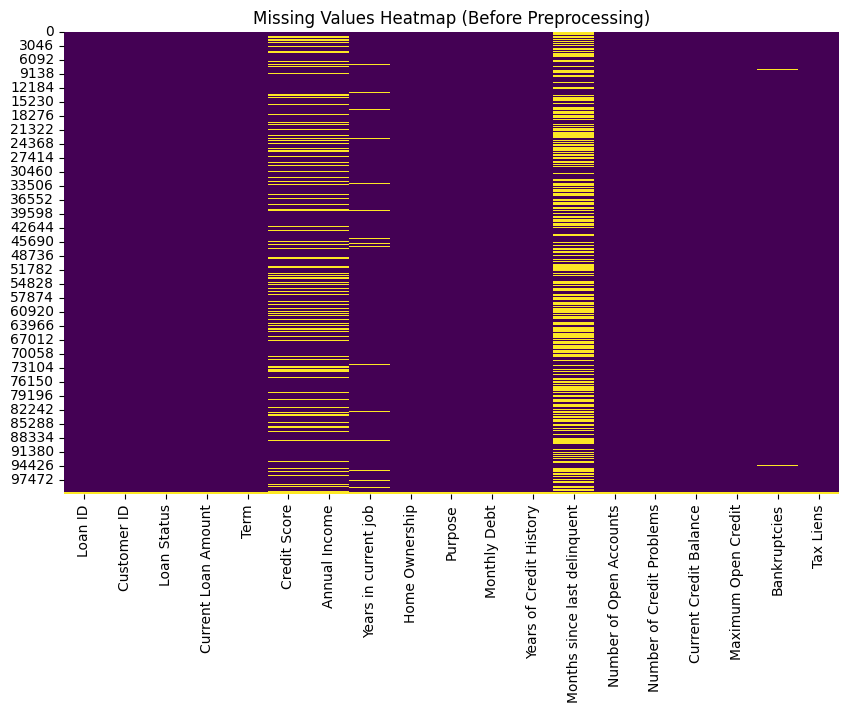

In [471]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (Before Preprocessing)")
plt.show()

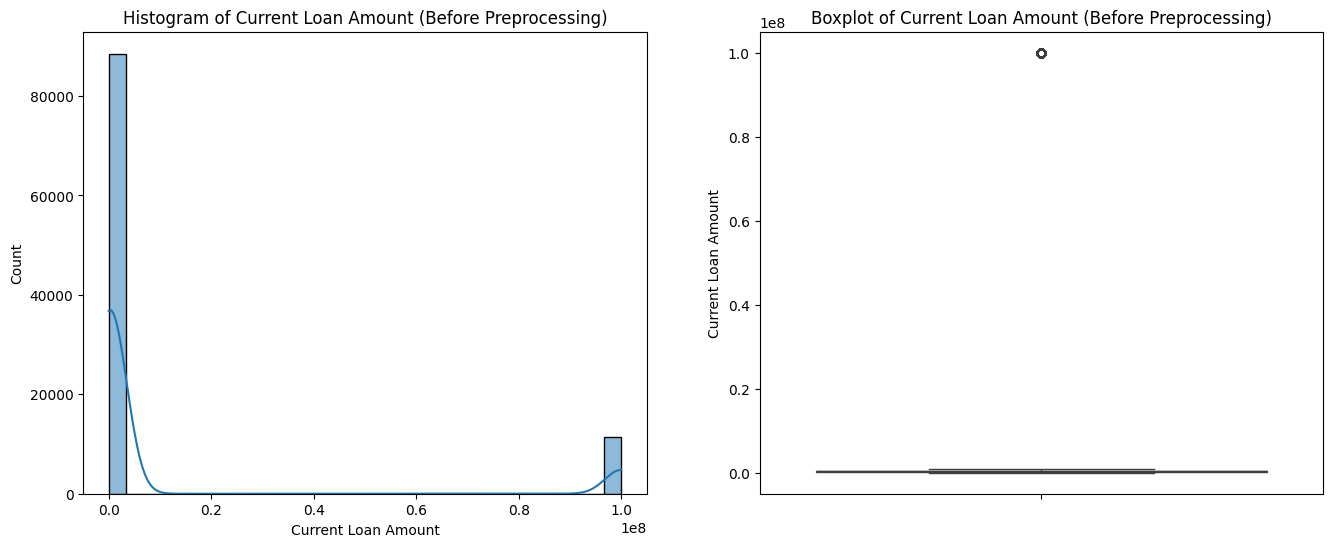

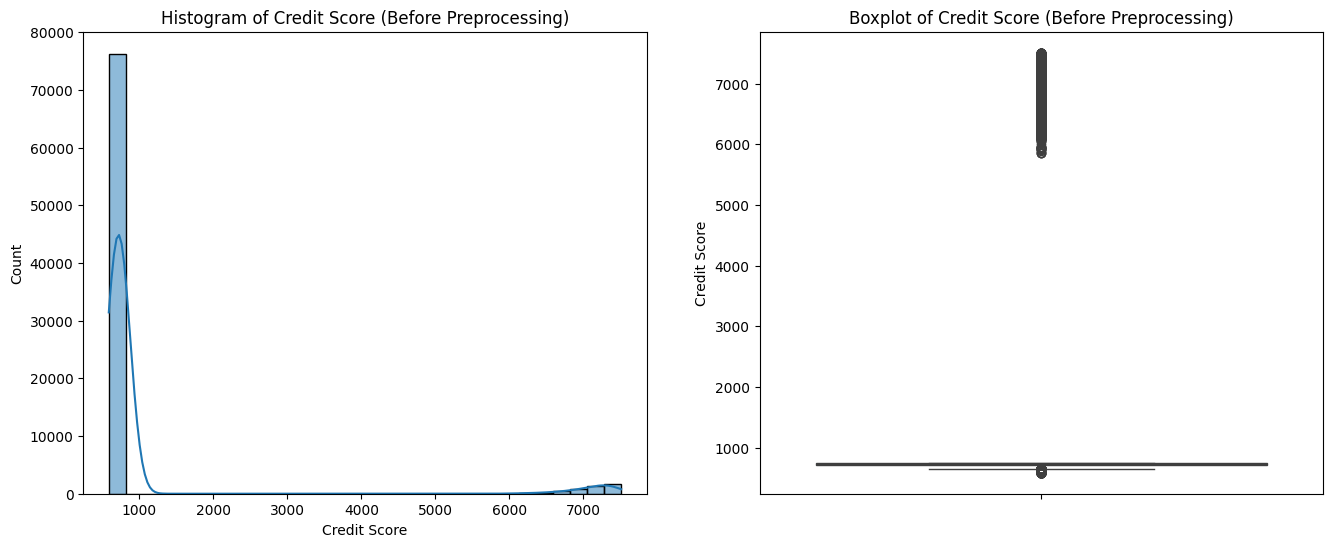

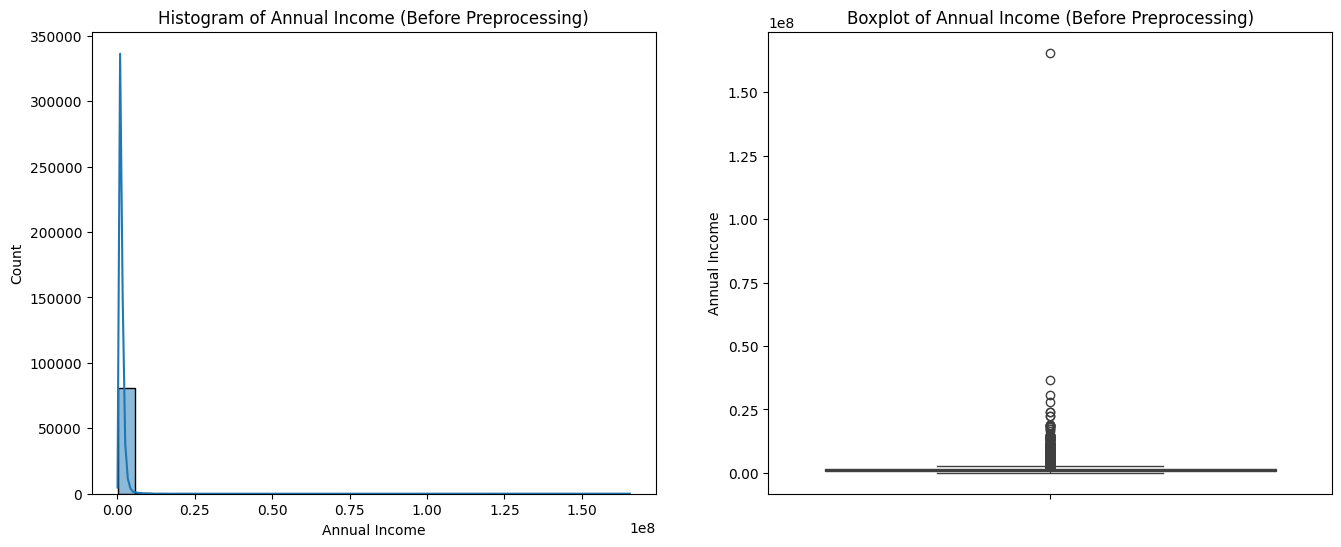

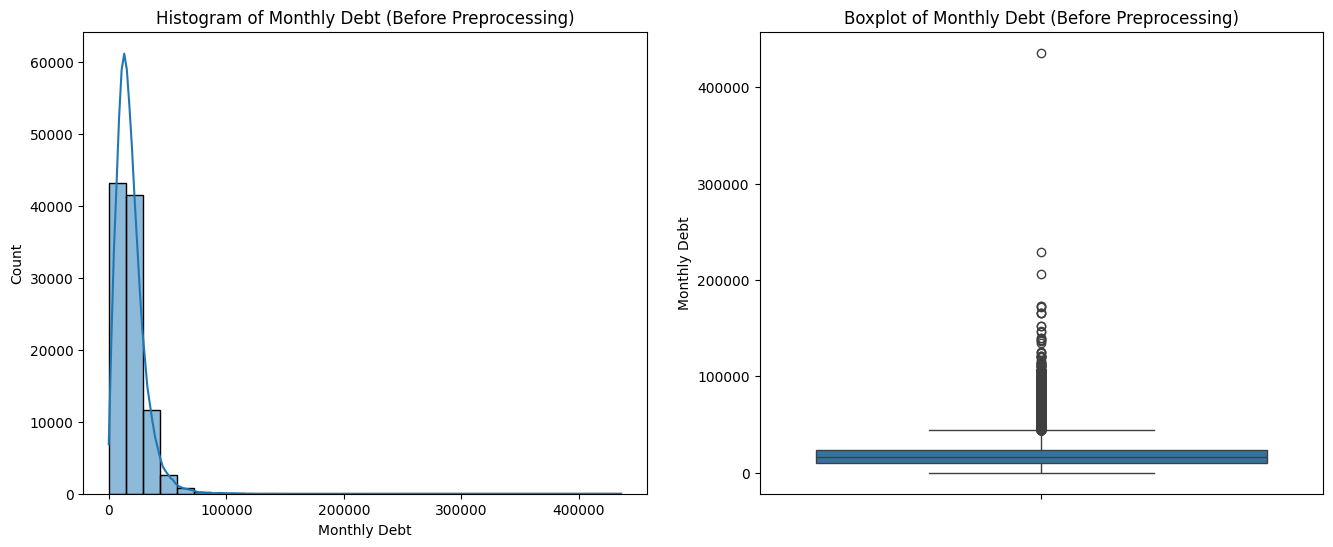

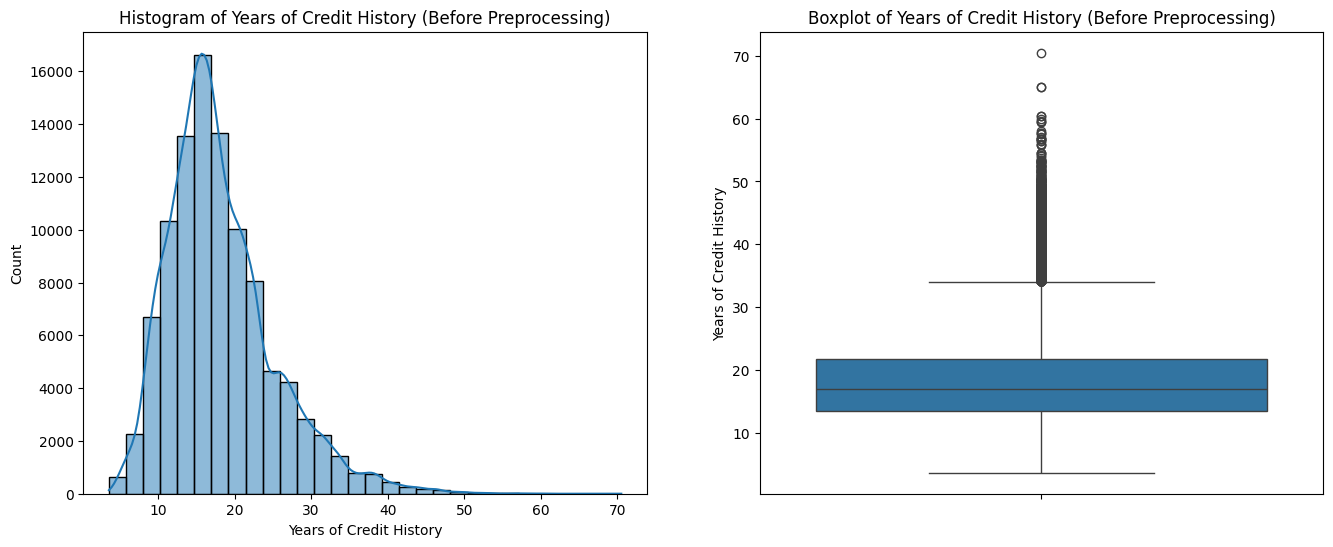

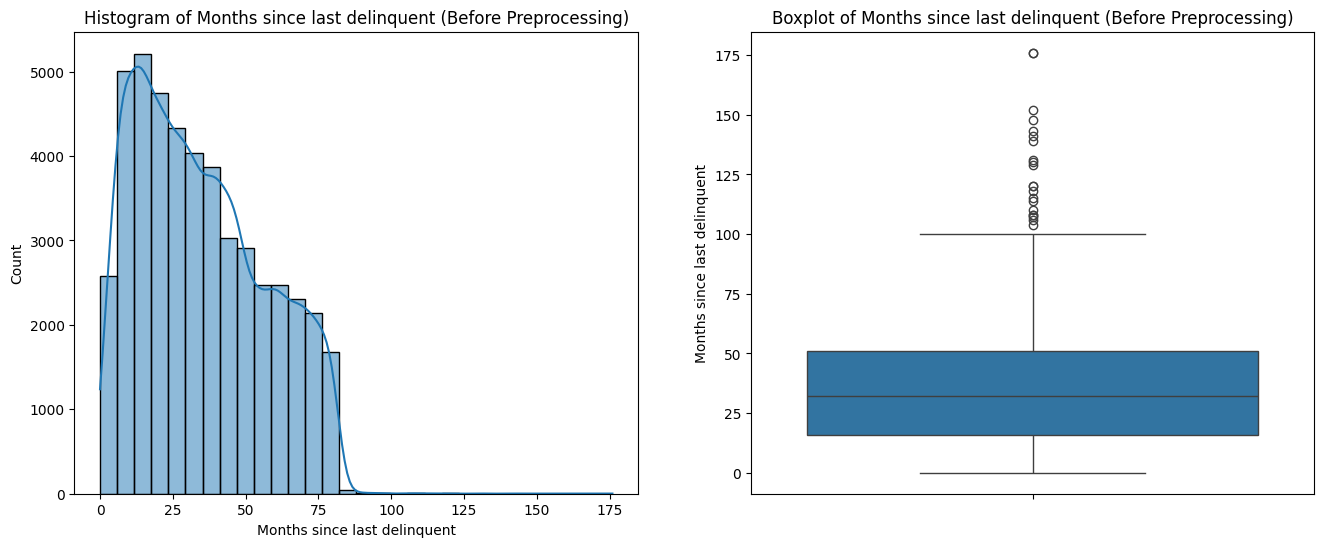

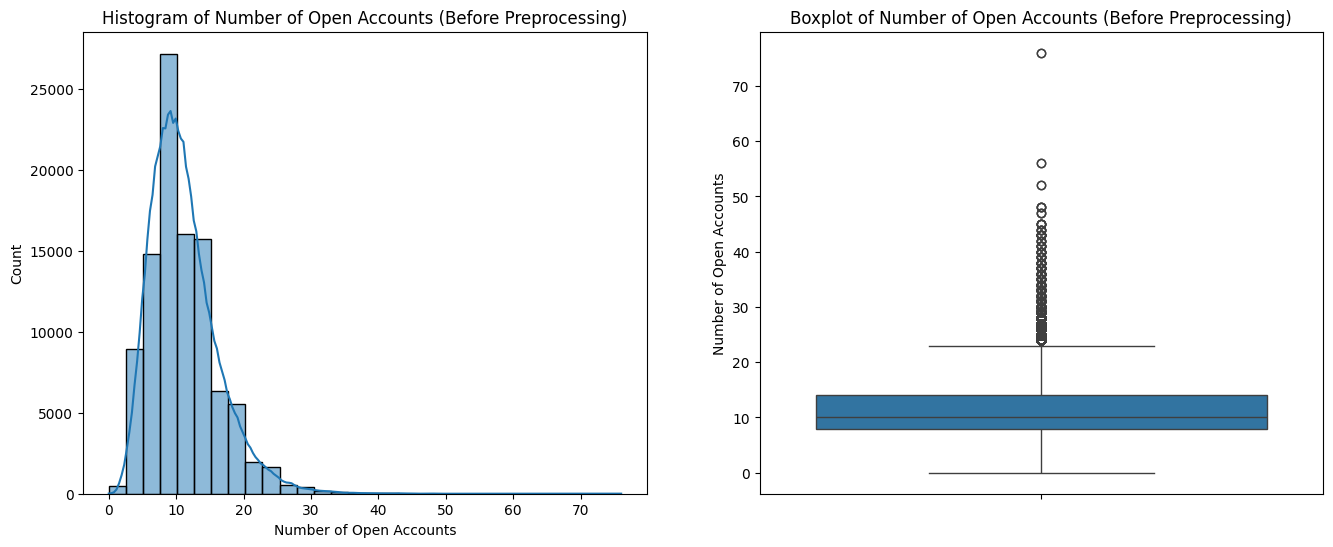

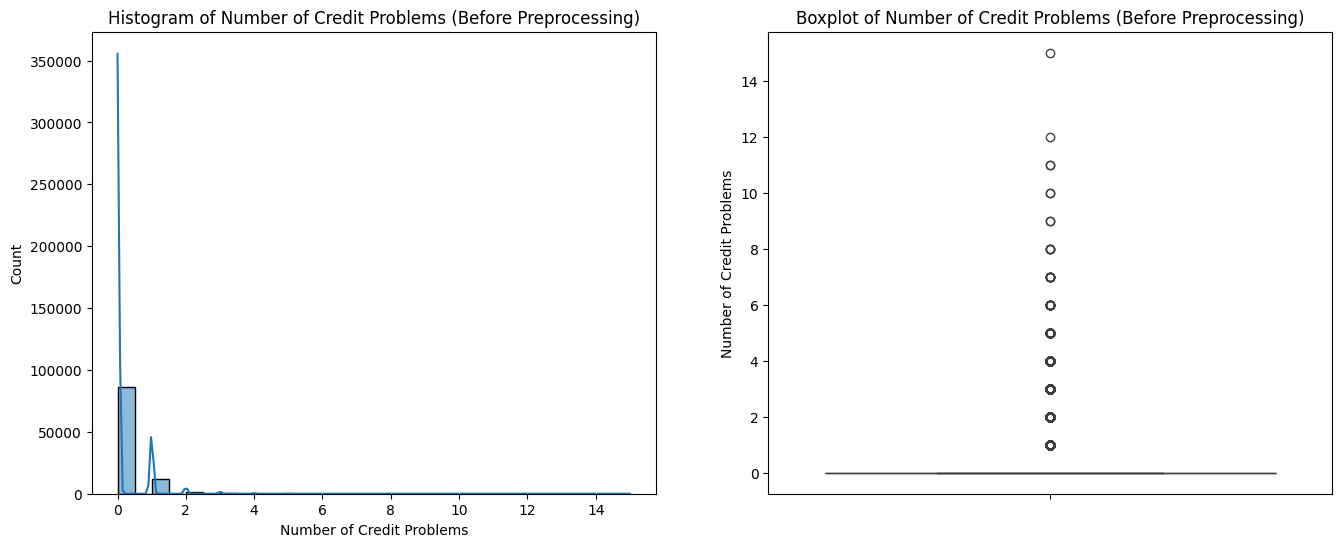

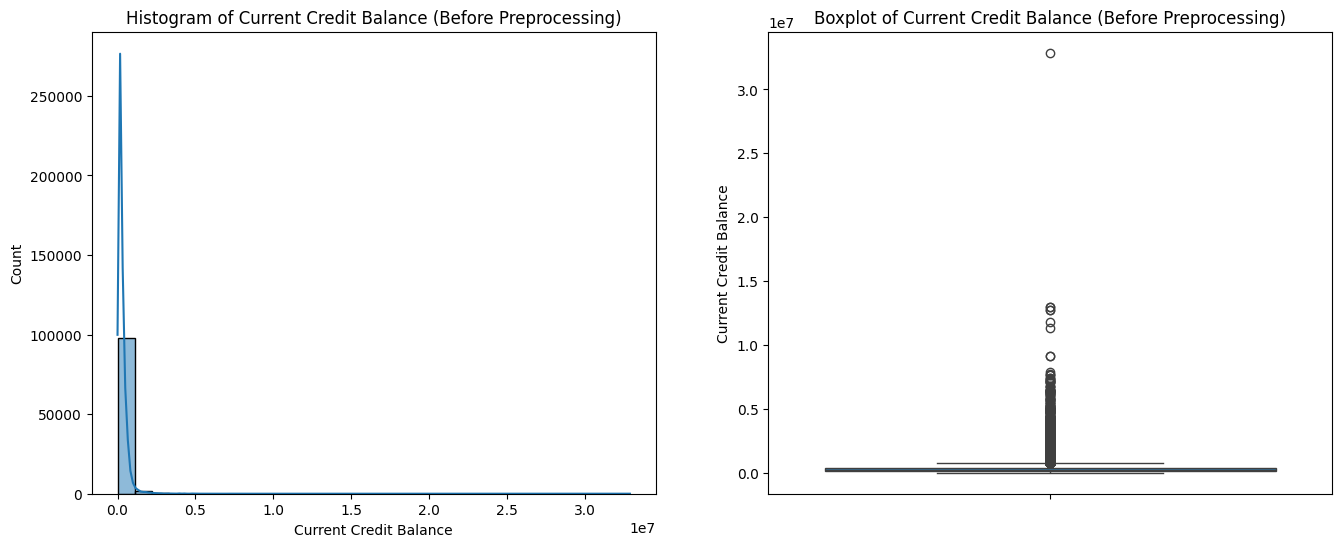

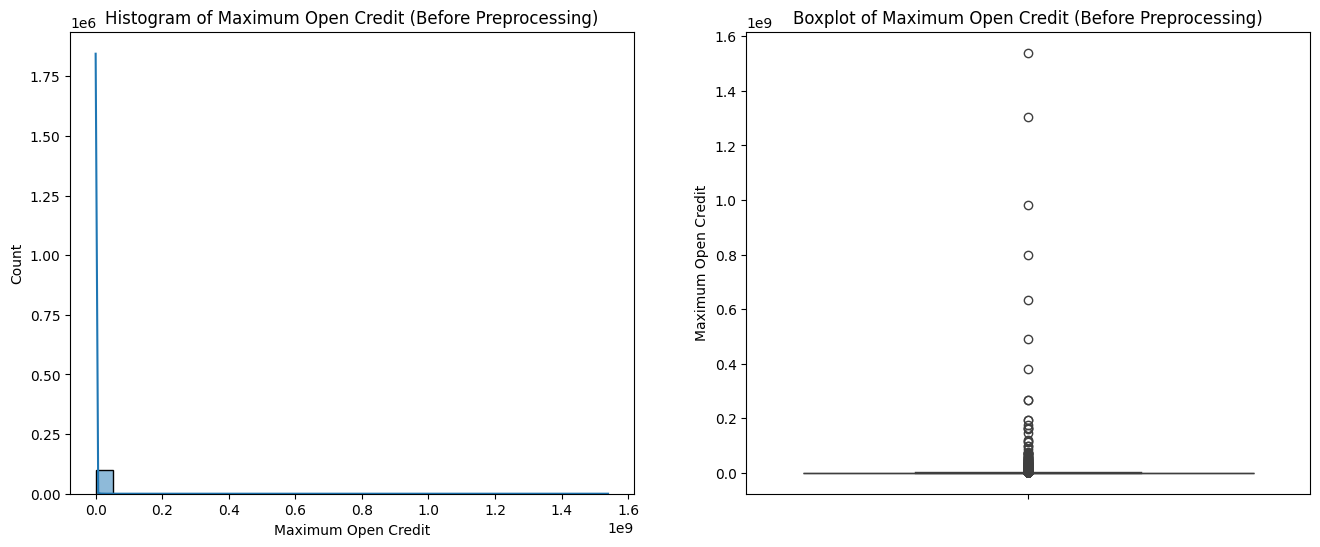

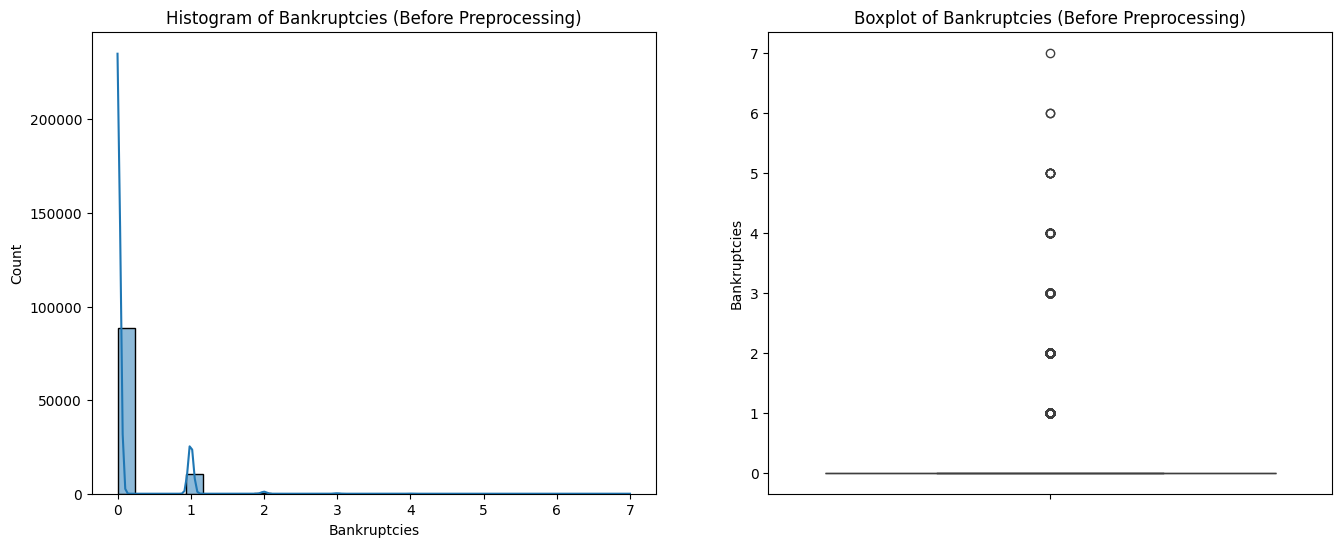

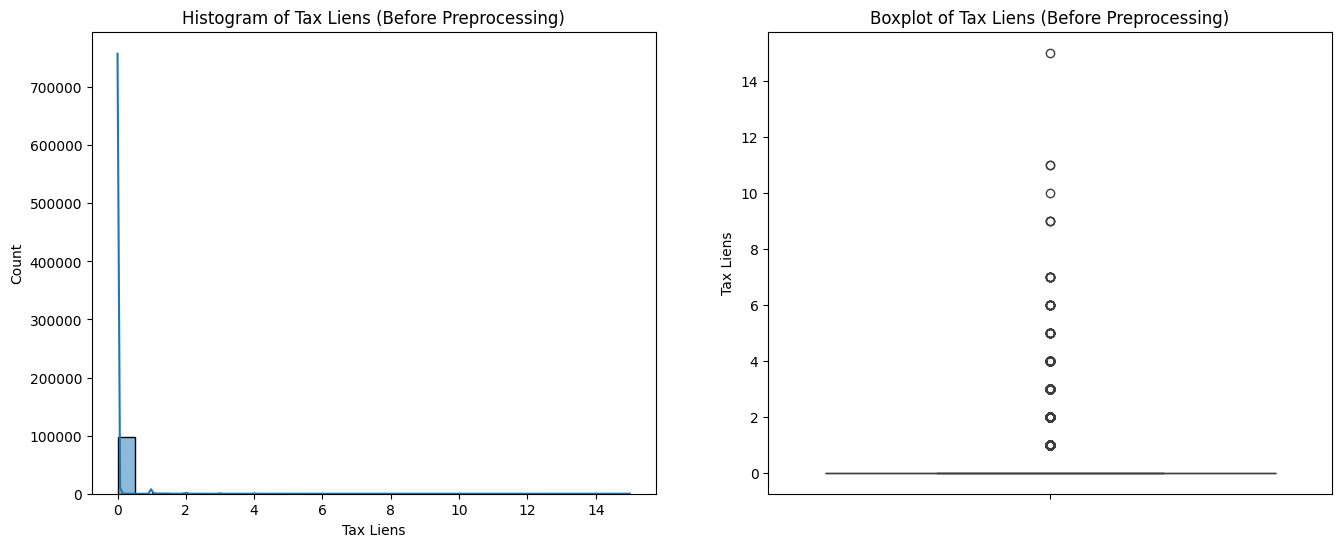

In [472]:
# Visualization of numeric and categorical features before preprocessing
for column in df.columns:
    if df[column].dtype.name in ['int64', 'float64']:
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Histogram of {column} (Before Preprocessing)')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot of {column} (Before Preprocessing)')
        plt.show()
    elif df[column].dtype.name == 'category':
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column], palette='viridis')
        plt.title(f'Countplot of {column} (Before Preprocessing)')
        plt.xticks(rotation=45)
        plt.subplot(1, 2, 2)
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
        plt.title(f'Pie Chart of {column} (Before Preprocessing)')
        plt.ylabel('')
        plt.show()

In [473]:
# Data Cleaning and Preprocessing
def preprocess_data(df):
    df.drop_duplicates(inplace=True)

    # Handle missing and categorical data
    df['Loan Status'] = df['Loan Status'].astype('category')
    df['Term'] = df['Term'].astype('category')
    df['Years in current job'] = df['Years in current job'].astype('category')
    df['Home Ownership'] = df['Home Ownership'].astype('category')

    if 'Purpose' in df.columns:
        category_mapping = {
            'home improvements': 'home',
            'debt consolidation': 'debt',
            'buy house': 'housing',
            'business loan': 'business',
            'buy a car': 'vehicle',
            'major purchase': 'other',
            'take a trip': 'leisure',
            'other': 'other',
            'small business': 'business',
            'medical bills': 'medical',
            'wedding': 'leisure',
            'vacation': 'leisure',
            'educational expenses': 'education',
            'moving': 'housing',
            'renewable energy': 'energy'
        }
        df['Purpose'] = df['Purpose'].str.lower().replace('_', ' ').map(category_mapping).fillna('other')
        df['Purpose'] = df['Purpose'].astype('category')

    # Fill missing values and convert types
    fill_mean_columns = ['Months since last delinquent', 'Current Loan Amount', 'Monthly Debt', 'Years of Credit History']
    for col in fill_mean_columns:
        df[col] = df[col].fillna(df[col].mean())

    fill_zero_columns = ['Credit Score', 'Annual Income', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
    for col in fill_zero_columns:
        df[col] = df[col].fillna(0).astype(float if col == 'Annual Income' else int)

    return df

df = preprocess_data(df)

In [474]:
# Exploratory Data Analysis (After Preprocessing)
print("EDA After Preprocessing")
print("Dataset Info:")
df.info()
print("Descriptive Statistics:")
print(df.describe(include='all'))

EDA After Preprocessing
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 89786 entries, 0 to 100000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Loan ID                       89785 non-null  object  
 1   Customer ID                   89785 non-null  object  
 2   Loan Status                   89785 non-null  category
 3   Current Loan Amount           89786 non-null  float64 
 4   Term                          89785 non-null  category
 5   Credit Score                  89786 non-null  int64   
 6   Annual Income                 89786 non-null  float64 
 7   Years in current job          85983 non-null  category
 8   Home Ownership                89785 non-null  category
 9   Purpose                       89786 non-null  category
 10  Monthly Debt                  89786 non-null  float64 
 11  Years of Credit History       89786 non-null  float64 
 12  Months since

/tmp/ipykernel_354549/3846037.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


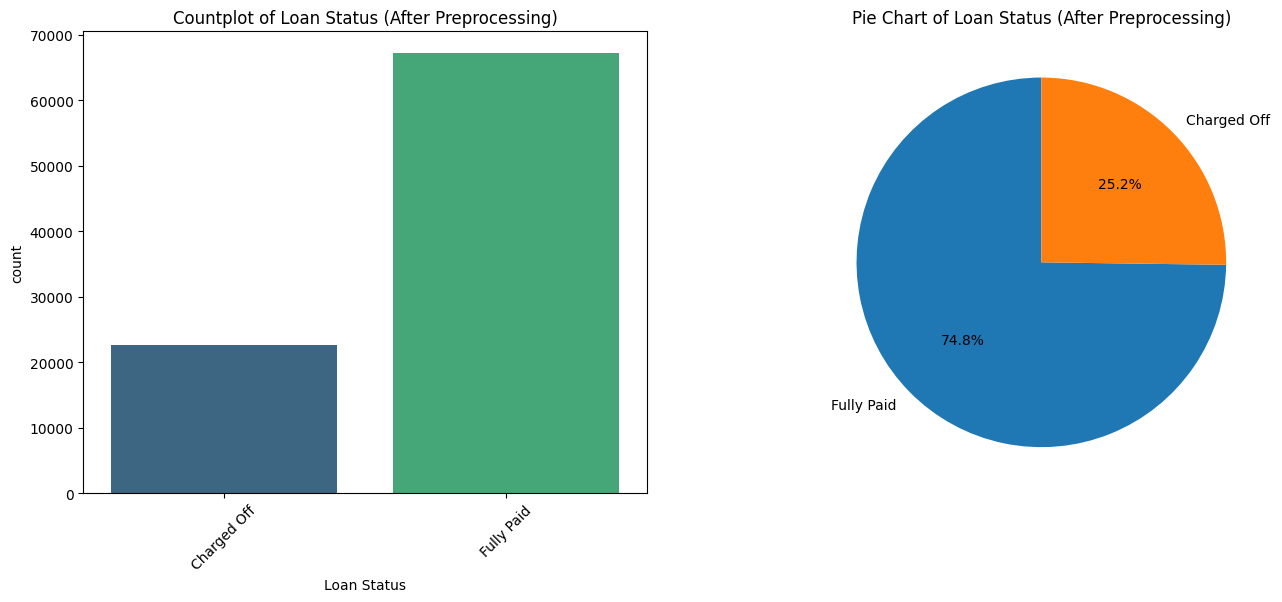

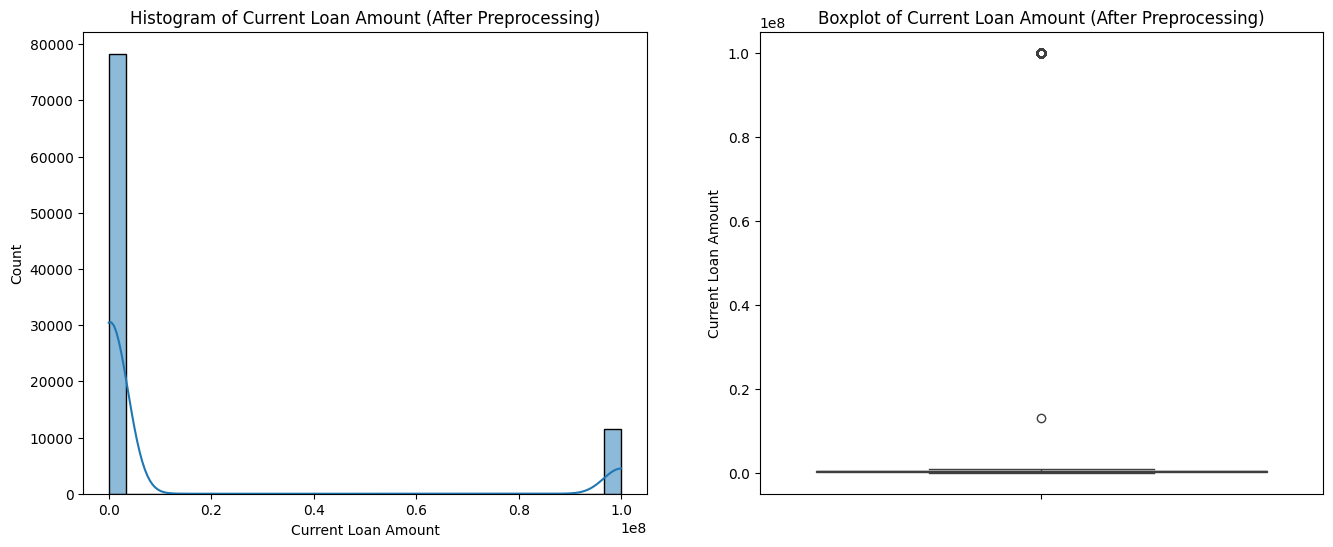

/tmp/ipykernel_354549/3846037.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


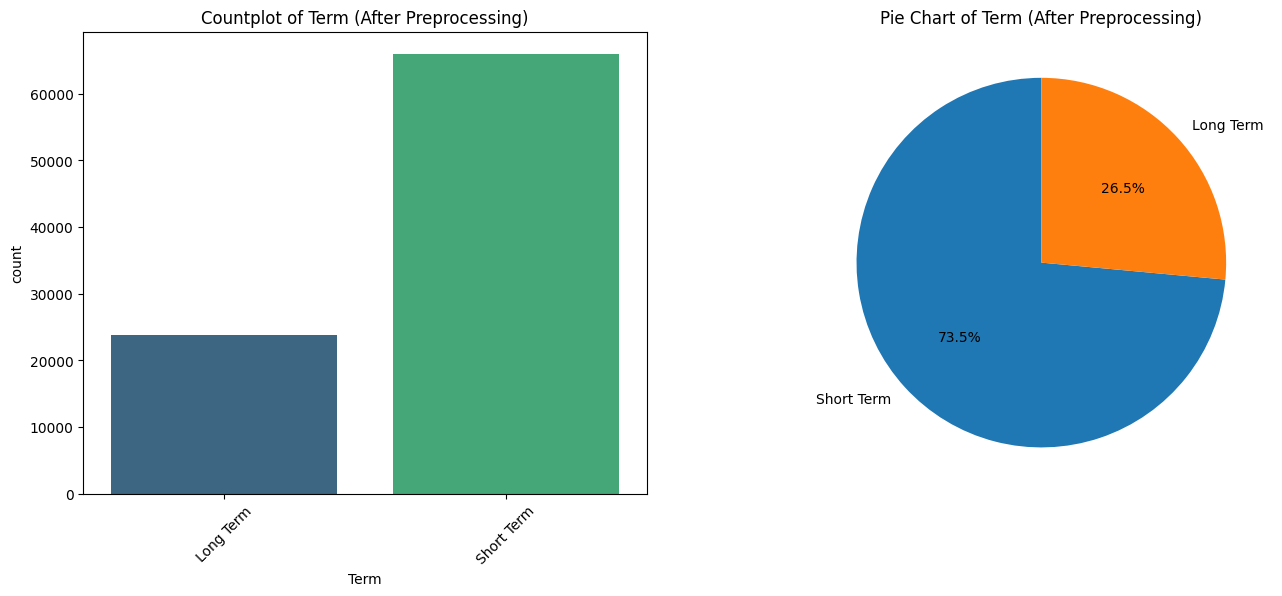

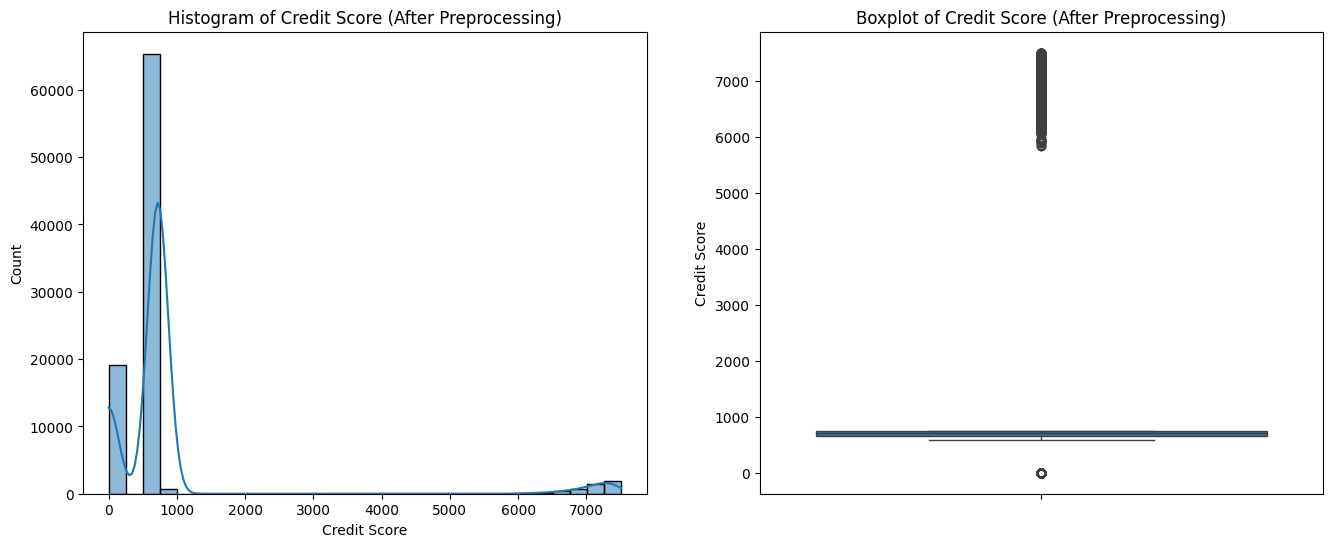

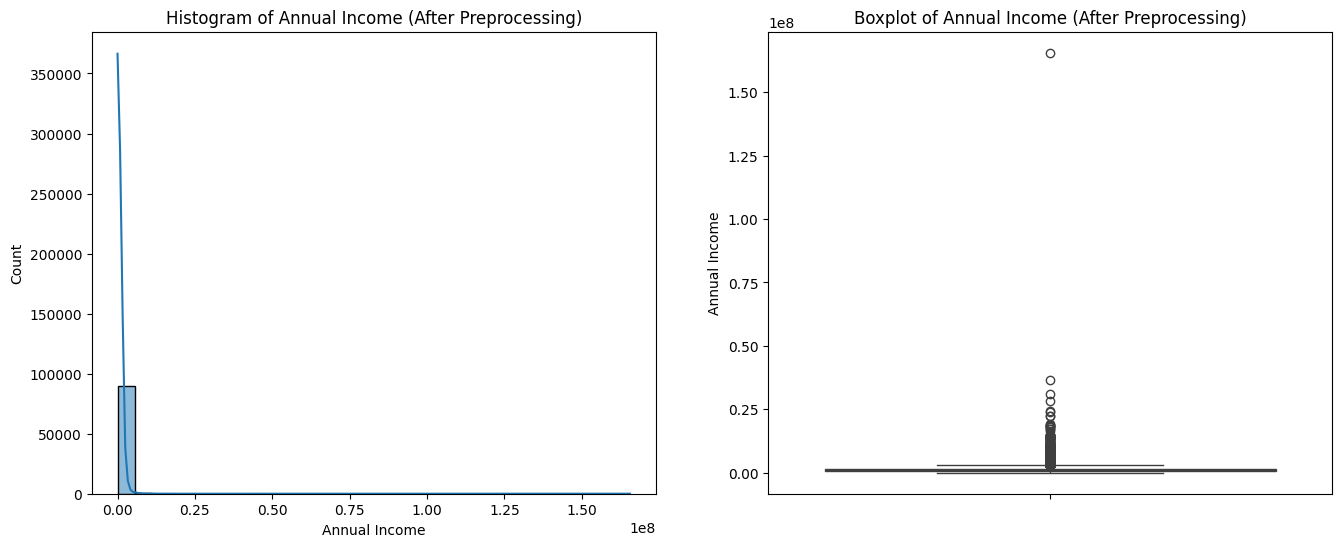

/tmp/ipykernel_354549/3846037.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


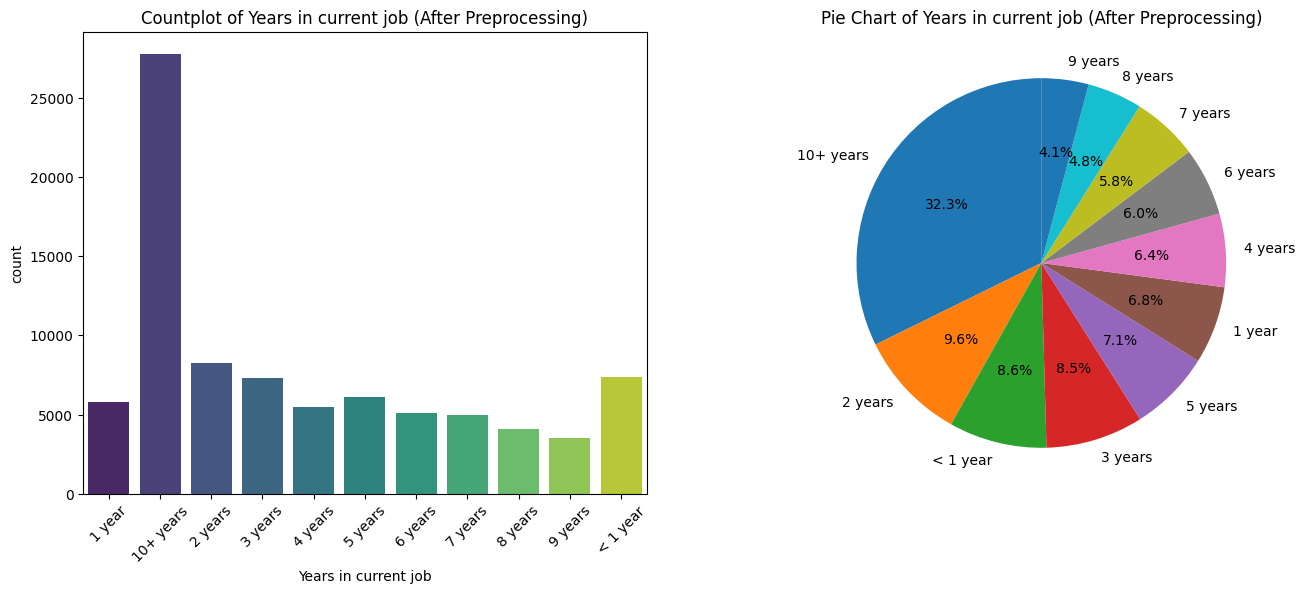

/tmp/ipykernel_354549/3846037.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


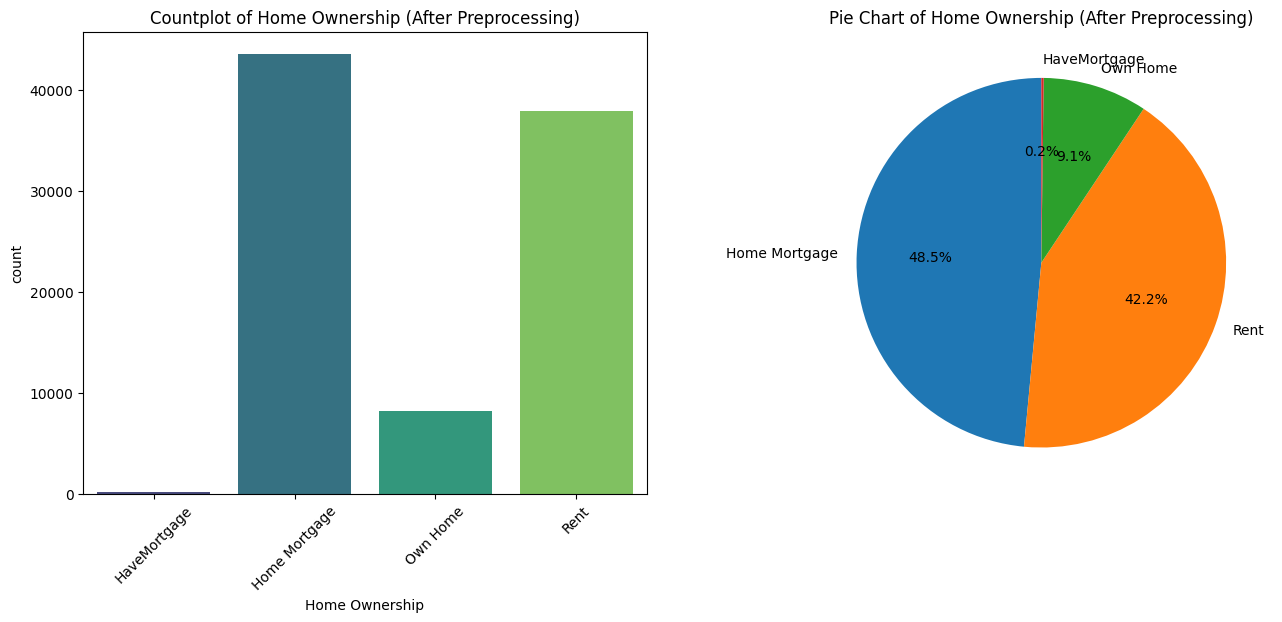

/tmp/ipykernel_354549/3846037.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


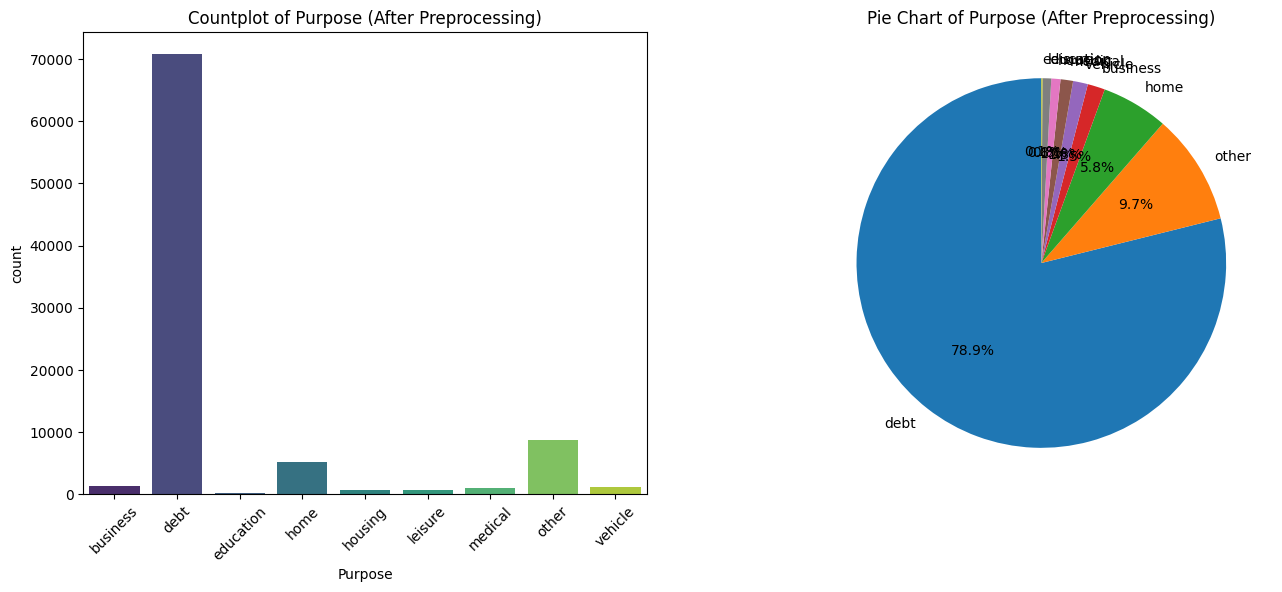

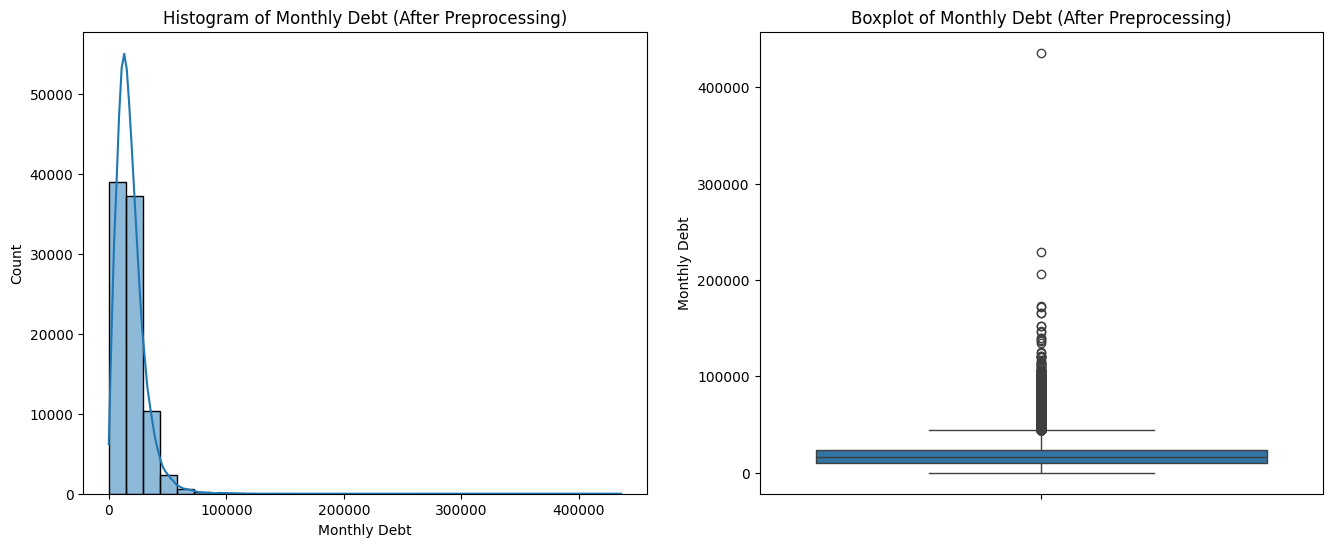

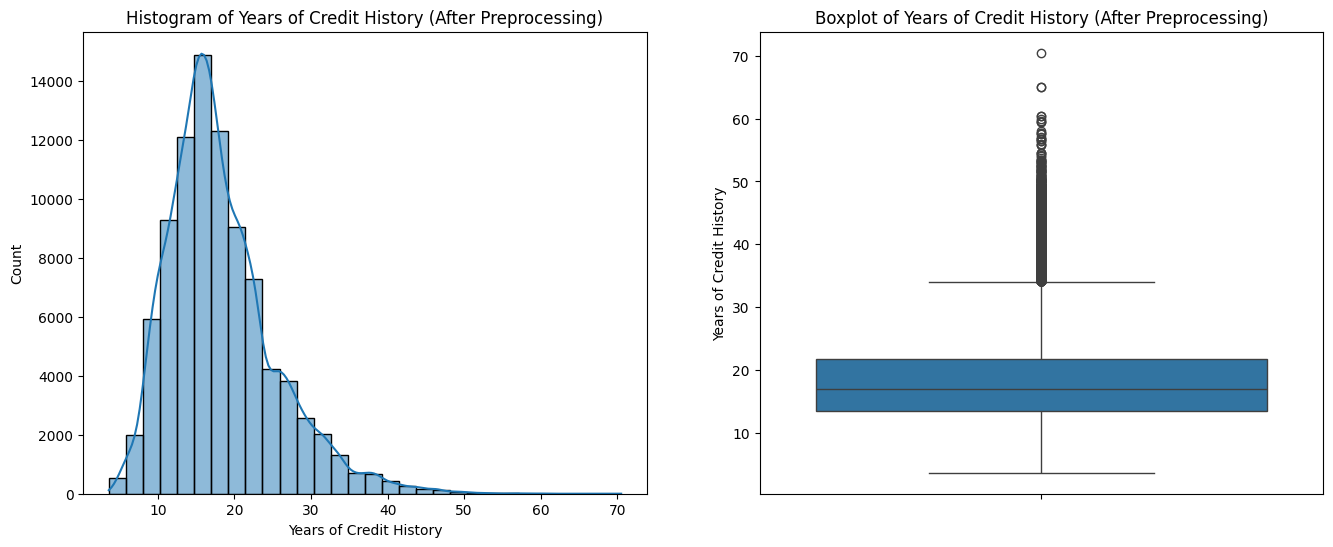

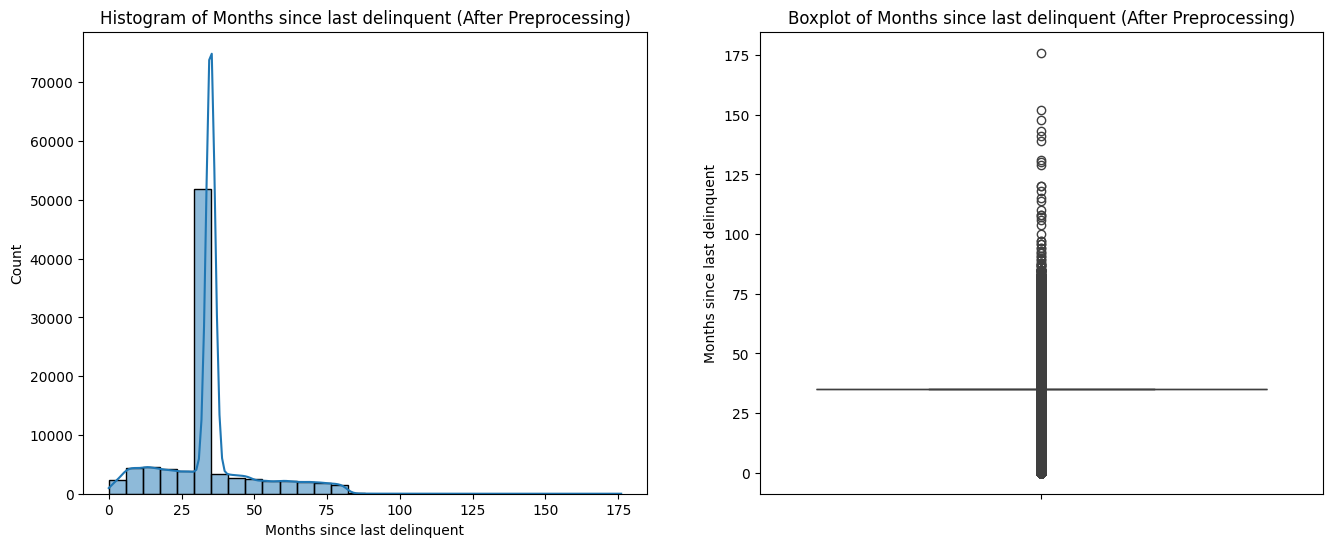

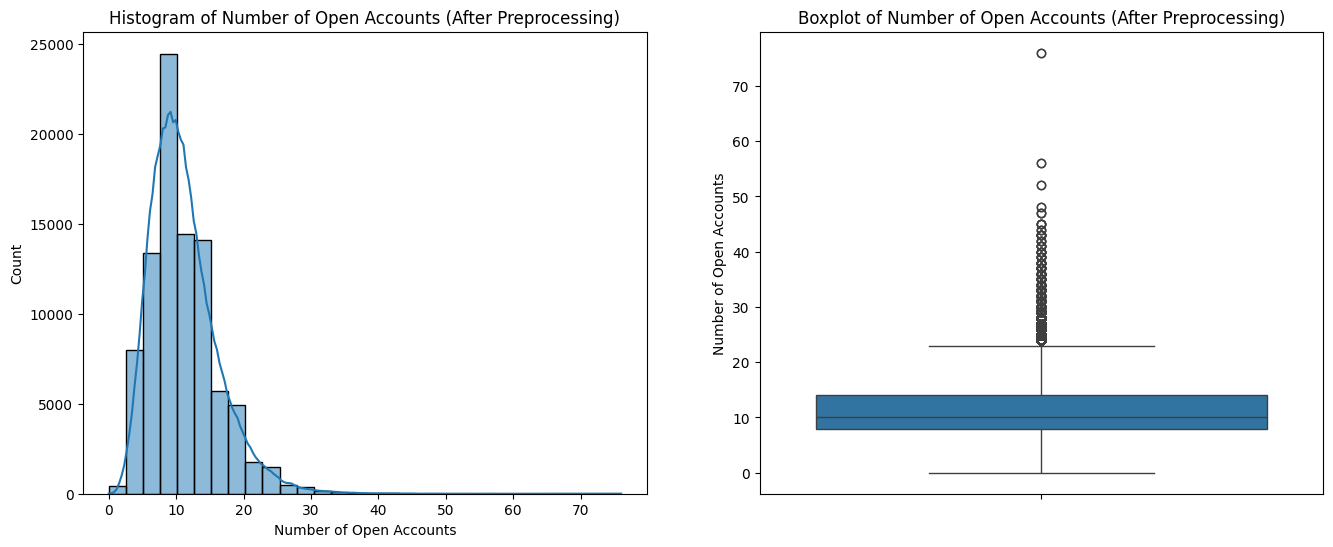

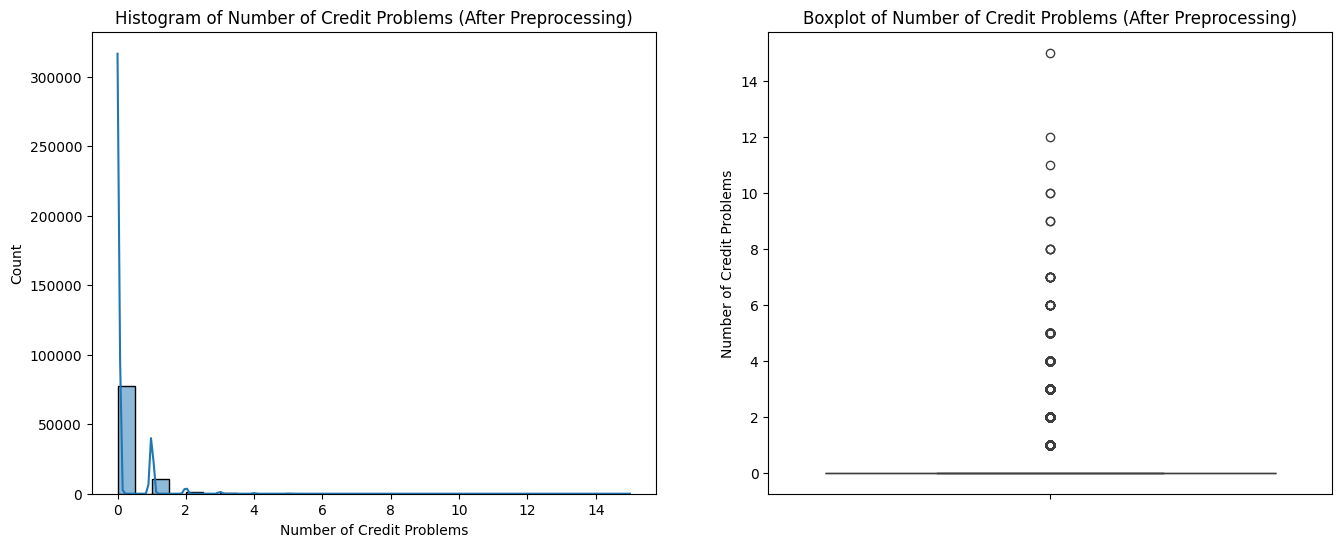

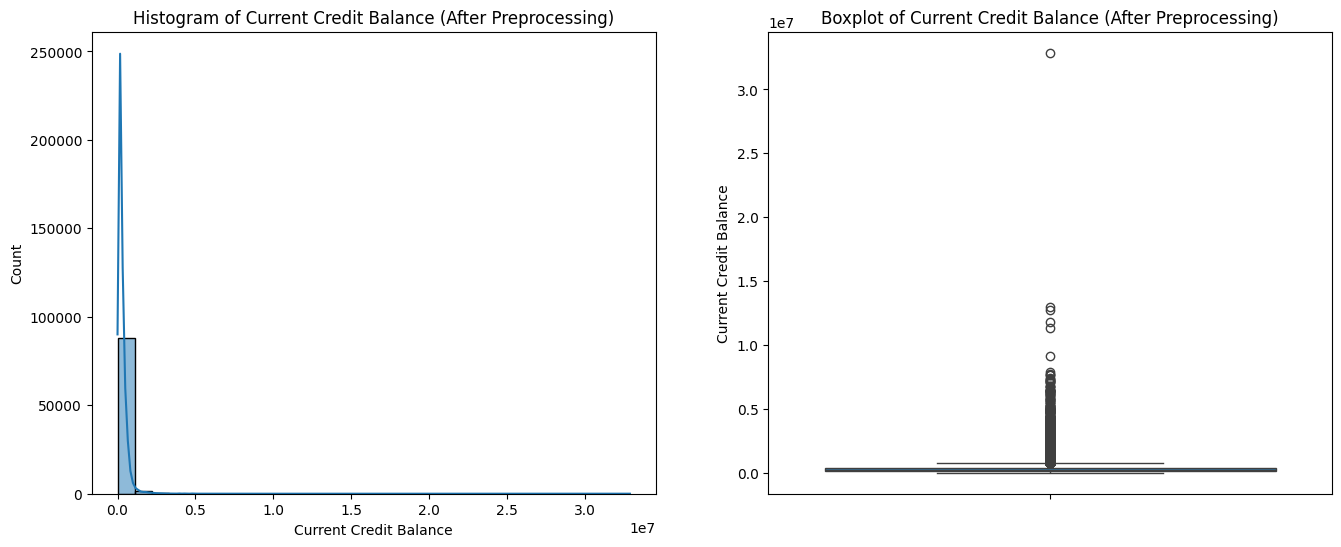

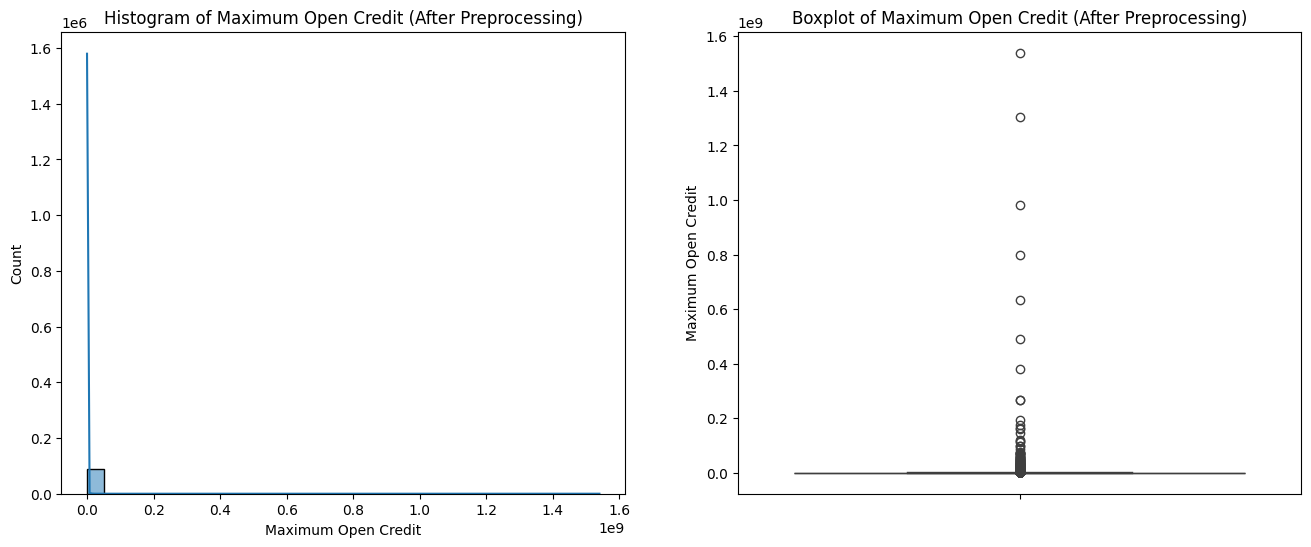

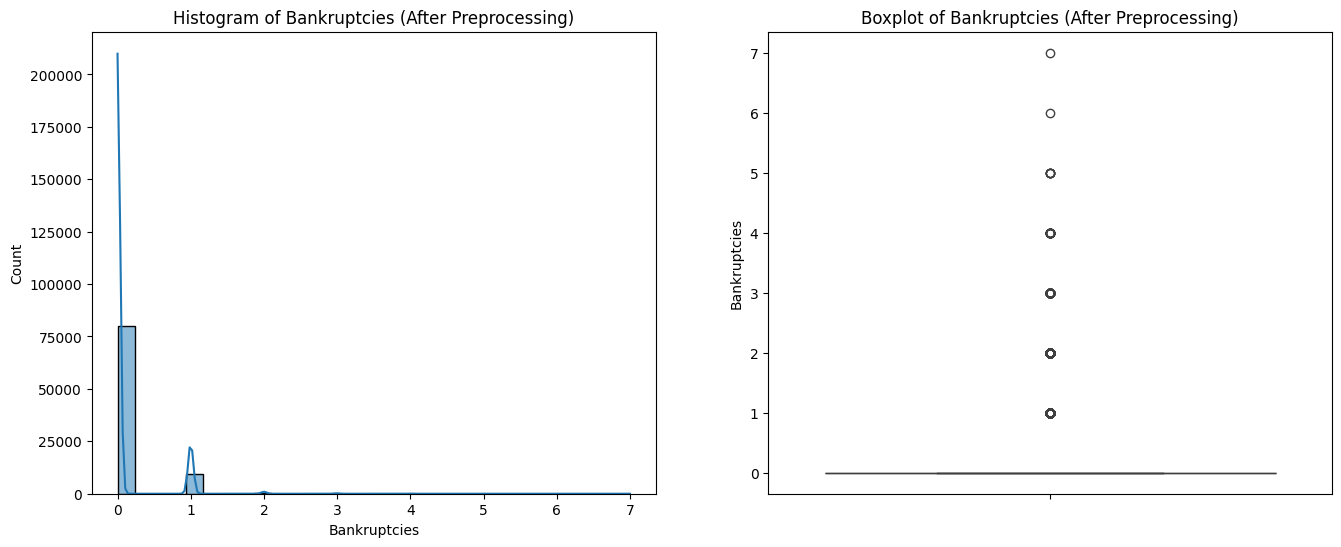

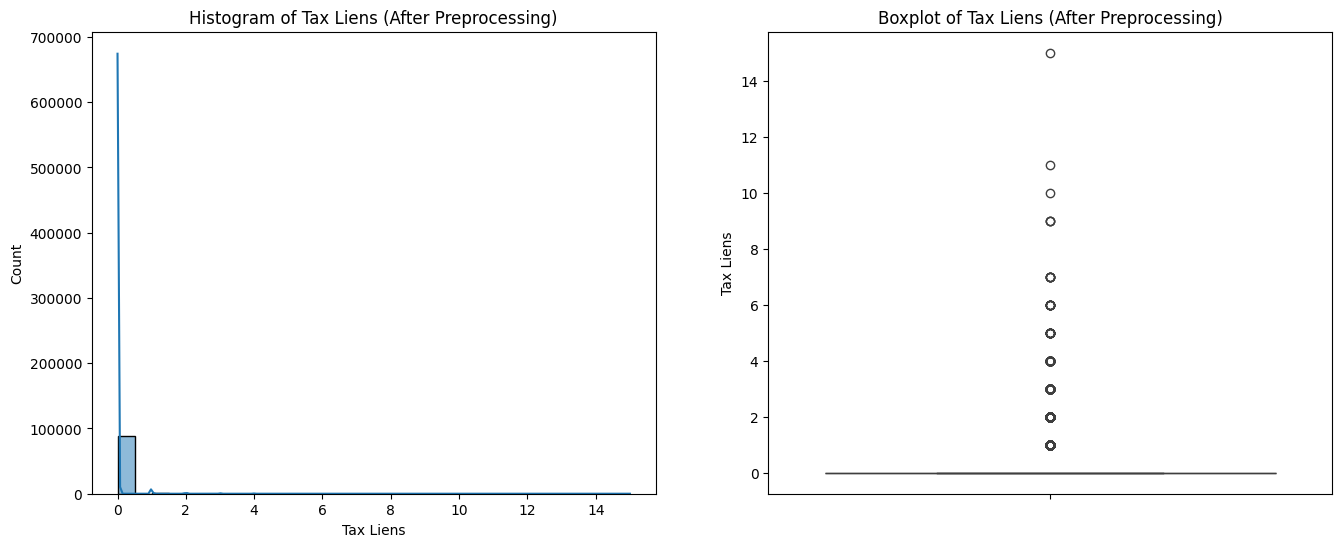

In [ ]:
# Visualization of numeric and categorical features after preprocessing
for column in df.columns:
    if df[column].dtype.name in ['int64', 'float64']:
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Histogram of {column} (After Preprocessing)')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot of {column} (After Preprocessing)')
        plt.show()
    elif df[column].dtype.name == 'category':
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column])
        plt.title(f'Countplot of {column} (After Preprocessing)')
        plt.xticks(rotation=45)
        plt.subplot(1, 2, 2)
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, )
        plt.title(f'Pie Chart of {column} (After Preprocessing)')
        plt.ylabel('')
        plt.show()